<a href="https://colab.research.google.com/github/parveen180/ML-/blob/main/Building_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Linear Regression

y=wx+b

*  w= weight/slope
*  b=bias/intercept


Gradient descent

*   w=w-a*dw
*   b=b-a*db




Learning Rate

*dw = (-2/n) * Σ[ x_i * (y_i -y_pred_i) ]

*db = (-2/n) * Σ[ (y_i - y_pred_i) ]

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import Lin_Reg

In [14]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ) :

        self.learning_rate = learning_rate

        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # initiating the weight and bias

        self.w = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y


        # implementing Gradient Descent for Optimization

        for i in range( self.no_of_iterations ) :

            self.update_weights()



    # function to update weights in gradient descent

   def update_weights( self ) :

        Y_prediction = self.predict( self.X )

        # calculate gradients

        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        # updating the weights

        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db


    # Line function for prediction:

   def predict( self, X ) :

        return X.dot( self.w ) + self.b


In [15]:
dataset=pd.read_csv('salary_data.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [16]:
dataset.isnull().sum()

,0
YearsExperience,0
Salary,0


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
model=Lin_Reg.Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [19]:
model.fit(x_train, y_train)

In [20]:
# printing the parameter values ( weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9313.751221252842
bias =  26772.645809264588


In [21]:
#Predict the salary value for test data
test_data_prediction = model.predict(x_test)

In [22]:
print(test_data_prediction)

[ 40743.27264114 122704.28338817  64959.0258164   63096.27557215
 115253.28241117 107802.28143416]


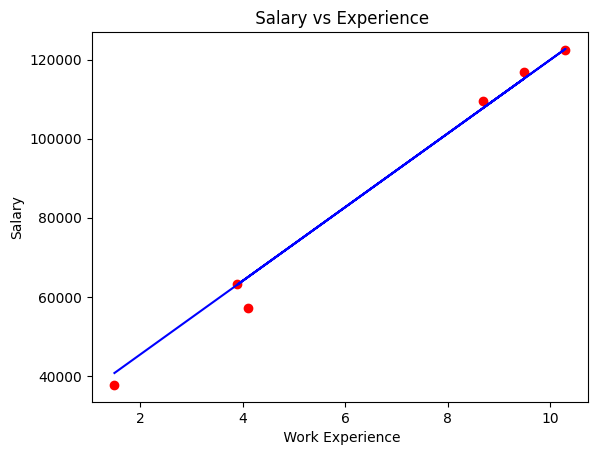

In [23]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()